Connection Successfull
curate
curate.parquet
   Index      Customer Id First Name Last Name  \
0      1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1      2  1Ef7b82A4CAAD10    Preston    Lozano   
2      3  6F94879bDAfE5a6        Roy     Berry   
3      4  5Cef8BFA16c5e3c      Linda     Olsen   
4      5  053d585Ab6b3159     Joanna    Bender   

                           Company               City  \
0                  Rasmussen Group       East Leonard   
1                      Vega-Gentry  East Jimmychester   
2                    Murillo-Perry      Isabelborough   
3  Dominguez, Mcmillan and Donovan         Bensonview   
4         Martin, Lang and Andrade     West Priscilla   

                      Country                 Phone 1                Phone 2  \
0                       Chile            229.077.5154       397.884.0519x718   
1                    Djibouti              5153435776       686-620-1820x944   
2         Antigua and Barbuda         +1-539-402-0259    (496)978-3969x

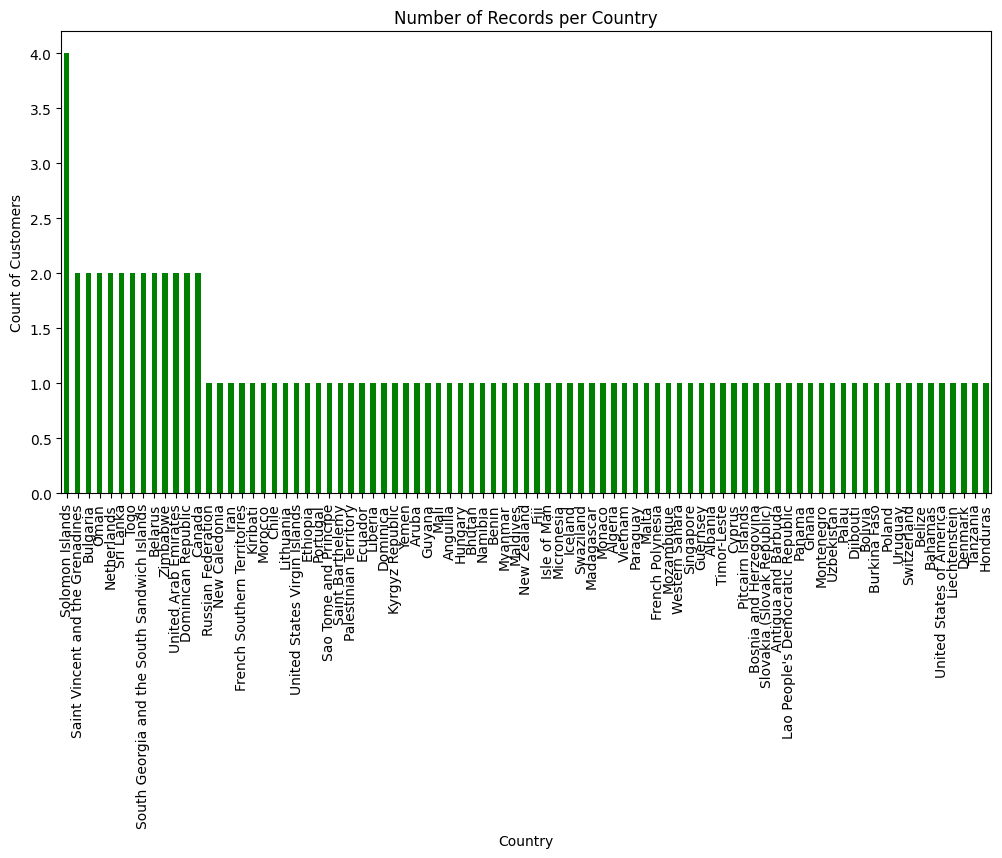

In [2]:
import os
import pandas as pd
from datetime import datetime
from connection import get_blob_service_client
from azure.storage.blob import BlobServiceClient, ContentSettings
import json
from io import BytesIO
import pyarrow.parquet as pq
import pyarrow as pa
import pyarrow.csv as pv
import pandera as pand
import matplotlib.pyplot as plt
def visualize_curate(container_name_source="curate"):
    blob_service_client = get_blob_service_client()
    blob_container_source = blob_service_client.get_container_client(container_name_source)
    blobs = blob_container_source.list_blobs()
    for blob in blobs:
        blob_name=blob['name']
    blob_client_source = blob_container_source.get_blob_client(blob_name)
    blob_content = blob_client_source.download_blob().readall()
    parq=pd.read_parquet(BytesIO(blob_content),engine="pyarrow")
    print(parq.head())
    # Data Analysis Example:
    # Analysis 1: Count of Customers per country
    country_counts = parq['Country'].value_counts()
    # Visualize the results using matplotlib
    # Plot 1: Number of records per country
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar', color='green')
    plt.title('Number of Records per Country')
    plt.xlabel('Country')
    plt.ylabel('Count of Customers')
    plt.show()        
if __name__=="__main__":
    visualize_curate()
    # list_blobs()
    # clear_blobs()